In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

s = plt.show()

In [2]:
data = pd.read_csv('data\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df = data.copy()
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
833,58,male,34.390,0,no,northwest,11743.93410
533,37,male,36.190,0,no,southeast,19214.70553
858,25,female,32.230,1,no,southeast,18218.16139
928,62,female,39.160,0,no,southeast,13470.80440
914,33,male,24.605,2,no,northwest,5257.50795


## 1. Data Validation

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print(f'So, we have age, sex, body mass index, children, smoker, region and charges: {df.columns}')

So, we have age, sex, body mass index, children, smoker, region and charges: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
df.isna().sum().sum()
# There are no null data

0

In [8]:
df.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

## 2. Exploratory Data Analysis

* Objective: To know and predict the costs related to health insurance in USA

### a. Descriptive

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


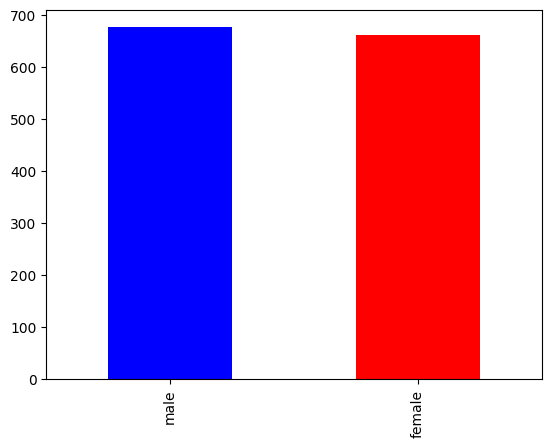

In [11]:
df.sex.value_counts().plot(kind='bar', color=['b', 'r'])
s

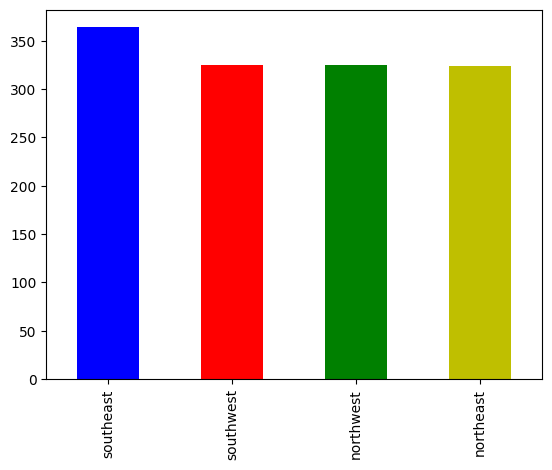

In [12]:
df.region.value_counts().plot(kind='bar', color=['b', 'r', 'g', 'y'])
s

In [13]:
(
  df.astype({
    'sex': 'category',
    'smoker': 'category',
    'region': 'category'
})
)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


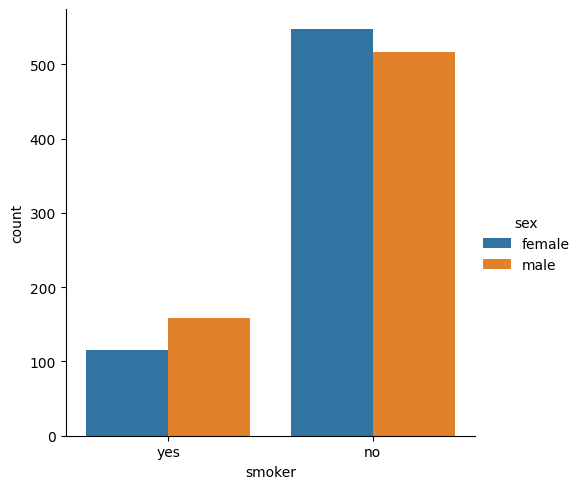

In [14]:
sns.catplot(data=df, x='smoker', kind='count', hue='sex')
s

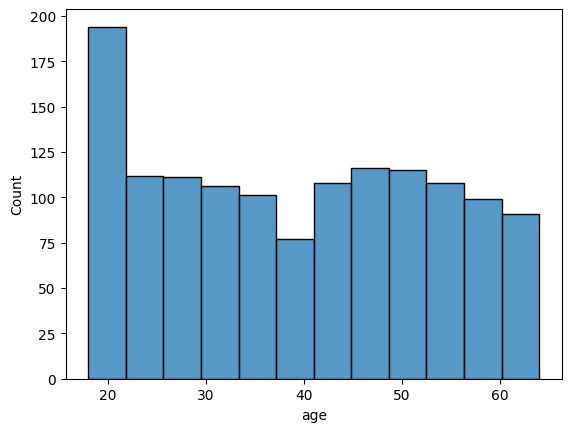

In [15]:
sns.histplot(data=df.age)
s

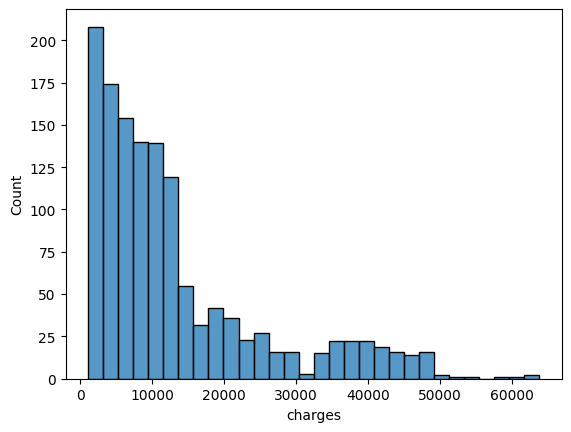

In [16]:
sns.histplot(data=df.charges)
s

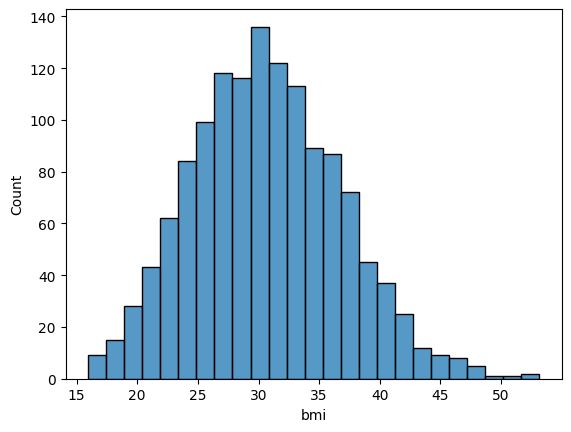

In [17]:
sns.histplot(data=df.bmi)
s

### b. Diagnostic

In [18]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [19]:
print(f'The mean of age is: {df.age.mean()}')
print(f'The median of age is: {df.age.median()}')
print(f'The standard deviation is: {df.age.std()}')

The mean of age is: 39.20702541106129
The median of age is: 39.0
The standard deviation is: 14.049960379216154


In [20]:
print(f'The mean of bmi is: {df.bmi.mean()}')
print(f'The median of bmi is: {df.bmi.median()}')
print(f'The standard deviation is: {df.bmi.std()}')

The mean of bmi is: 30.66339686098655
The median of bmi is: 30.4
The standard deviation is: 6.098186911679014


In [21]:
print(f'The mean of charges is: {df.charges.mean()}')
print(f'The median of charges is: {df.charges.median()}')
print(f'The standard deviation is: {df.charges.std()}')

The mean of charges is: 13270.422265141257
The median of charges is: 9382.033
The standard deviation is: 12110.011236694001


In [22]:
max_values = df[['age', 'bmi', 'charges']].max()
min_values = df[['age', 'bmi', 'charges']].min()
range_values = max_values - min_values
q1 = df[['age', 'bmi', 'charges']].quantile(.25)
q3 = df[['age', 'bmi', 'charges']].quantile(.75)
iq = q3 - q1

value_range = pd.DataFrame([min_values, q1, q3, max_values, range_values, iq], index=['min', 'q1', 'q3', 'max', 'range', 'interquartile'])
value_range = value_range.T

In [23]:
value_range

,min,q1,q3,max,range,interquartile
age,18.0000,27.00000,51.000000,64.00000,46.00000,24.000000
bmi,15.9600,26.29625,34.693750,53.13000,37.17000,8.397500
charges,1121.8739,4740.28715,16639.912515,63770.42801,62648.55411,11899.625365


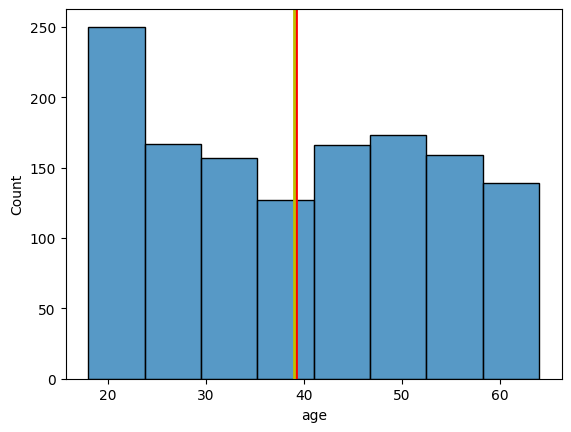

In [24]:
sns.histplot(data=df, x='age', bins=8)
plt.axvline(df.age.mean(), color='r', linewidth=2)
plt.axvline(df.age.median(), color='y', linewidth=2)
s

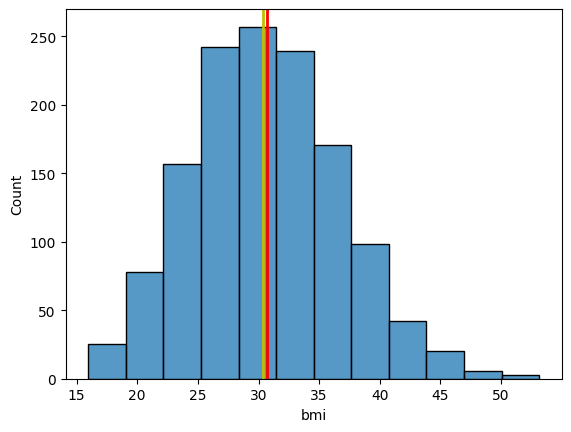

In [25]:
sns.histplot(data=df, x='bmi', bins=12)
plt.axvline(df.bmi.mean(), color='r', linewidth=2)
plt.axvline(df.bmi.median(), color='y', linewidth=2)
s

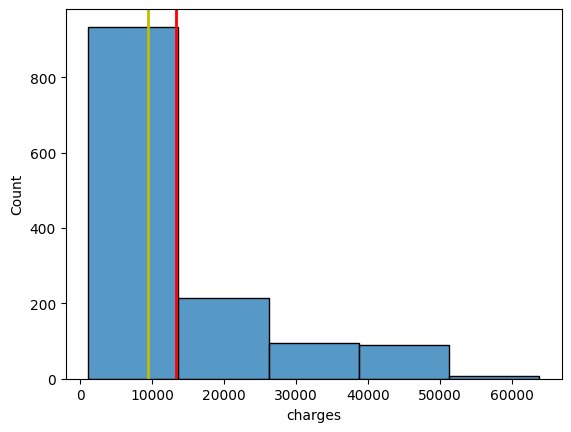

In [26]:
sns.histplot(data=df, x='charges', bins=5)
plt.axvline(df.charges.mean(), color='r', linewidth=2)
plt.axvline(df.charges.median(), color='y', linewidth=2)
s

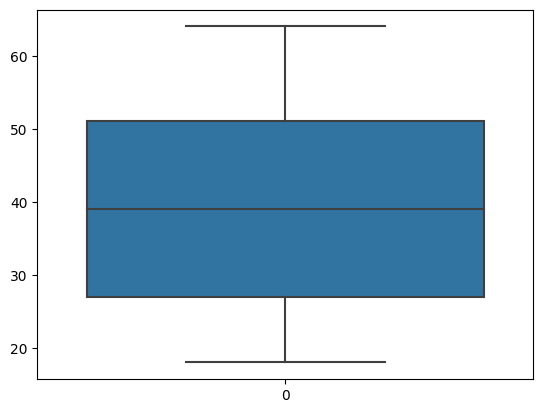

In [27]:
sns.boxplot(df.age)
s

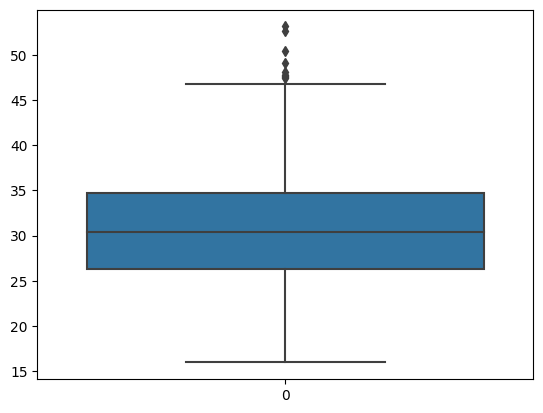

In [28]:
sns.boxplot(df.bmi)
s

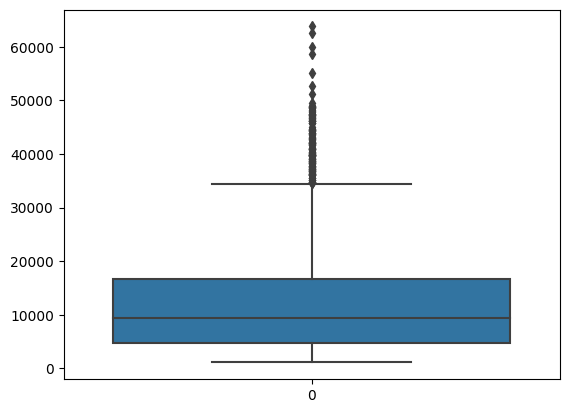

In [29]:
sns.boxplot(df.charges)
s

### Probability Distribution

*Mass Probability*

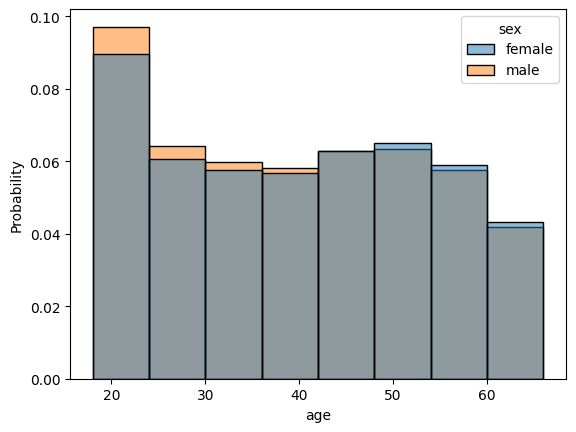

In [30]:
sns.histplot(data=df, x='age', hue='sex', binwidth=6, stat='probability')
s

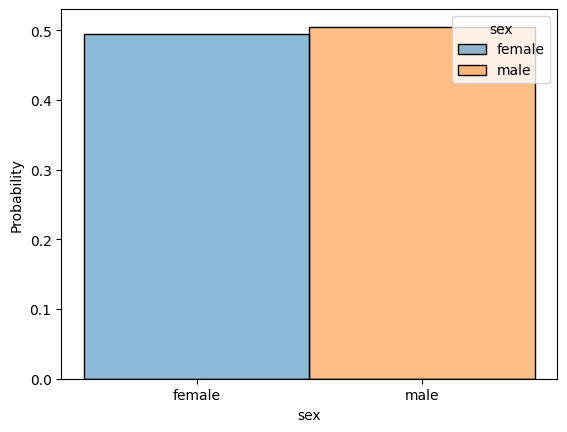

In [31]:
sns.histplot(data=df, x='sex', hue='sex', stat='probability')
s

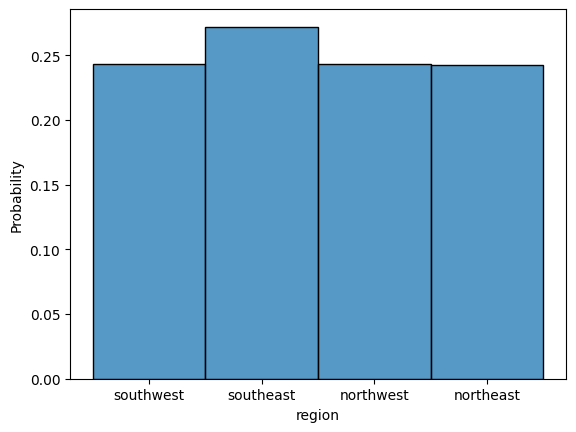

In [32]:
sns.histplot(data=df, x='region', stat='probability')
s

*Probability Mass Function*

In [33]:
import scipy
import empiricaldist

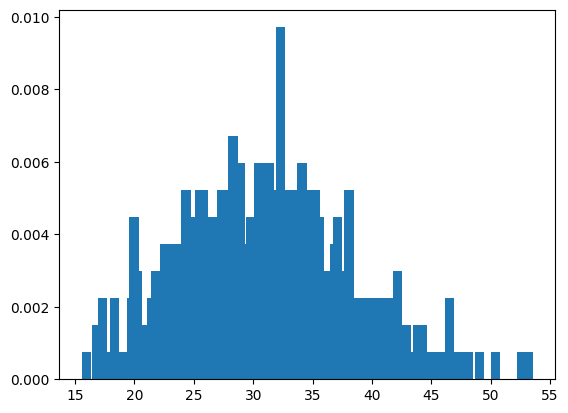

In [34]:
pmf_bmi = empiricaldist.Pmf.from_seq(df.bmi, normalize=True)
pmf_bmi.bar()

In [35]:
print(f'The probability of being in the mode of bmi (32.3) is: {pmf_bmi(df.bmi.mode())*100}%')

The probability of being in the mode of bmi (32.3) is: [0.9715994]%


In [36]:
pmf_charges = empiricaldist.Pmf.from_seq(df.charges, normalize=True)
print(f'The probability of pay the most frequent charge (1639.5631) is: {pmf_charges(df.charges.mode())*100}%')

The probability of pay the most frequent charge (1639.5631) is: [0.14947683]%


*Empirical Cumulative distribution function*

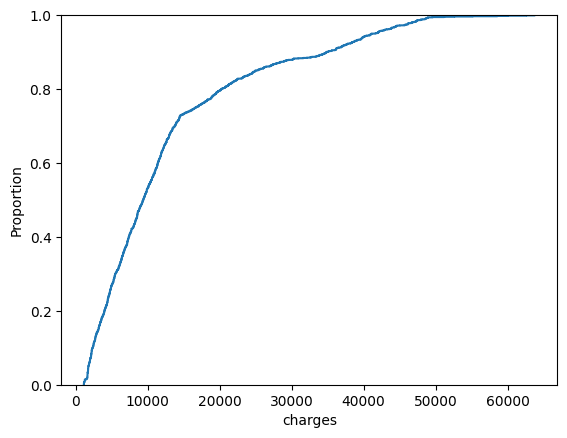

In [37]:
sns.ecdfplot(data=df, x='charges')
s

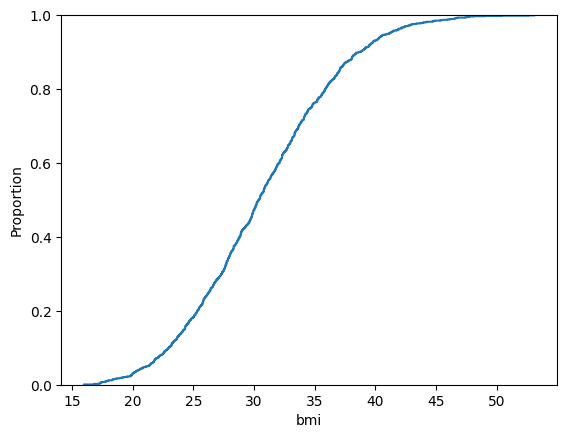

In [38]:
sns.ecdfplot(data=df, x='bmi')
s

*Cumulative Probability Function*

In [39]:
cdf_charges = empiricaldist.Cdf.from_seq(df.charges, normalize=True)
cdf_bmi = empiricaldist.Cdf.from_seq(df.bmi, normalize=True)

In [40]:
print(f'The probability of having a healthy bmi (24.9 or less) is: {cdf_bmi(29.4)*100}%')

The probability of having a healthy bmi (24.9 or less) is: 43.27354260089686%


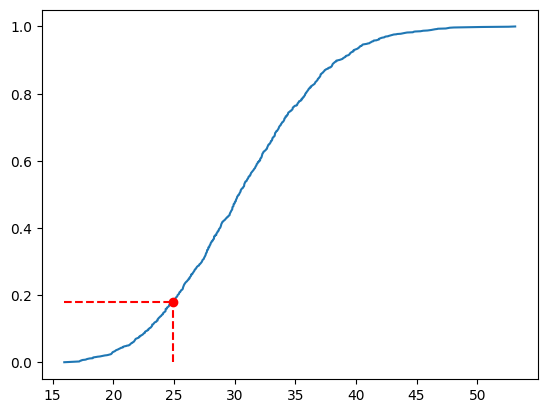

In [41]:
cdf_bmi.plot()

q=24.9
p=cdf_bmi.forward(q)

plt.vlines(
    x=q,
    ymin=0, ymax=p,
    color='red', linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_bmi.qs[0], xmax=q,
    color='red', linestyle='dashed'
)

plt.plot(q, p, 'ro')
s

In [42]:
print(f'The probability of paying 10000 USD or less for your medical insurance is: {cdf_charges(10000)*100}%')

The probability of paying 10000 USD or less for your medical insurance is: 53.21375186846039%


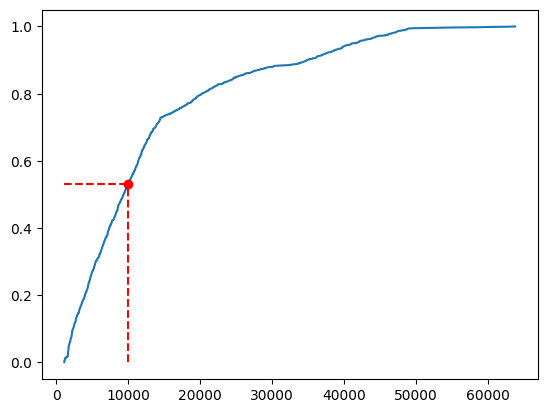

In [43]:
cdf_charges.plot()

q=10000
p=cdf_charges.forward(q)

plt.vlines(
    x=q,
    ymin=0, ymax=p,
    color='red', linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_charges.qs[0], xmax=q,
    color='red', linestyle='dashed'
)

plt.plot(q, p, 'ro')
s

In [44]:
print(f'The first 25% of people have a bmi of: {cdf_bmi.inverse(.25)}')

The first 25% of people have a bmi of: 26.29


In [45]:
print(f'The first 25% of people pay: {cdf_charges.inverse(.25)} USD for their medical insurance')

The first 25% of people pay: 4738.2682 USD for their medical insurance


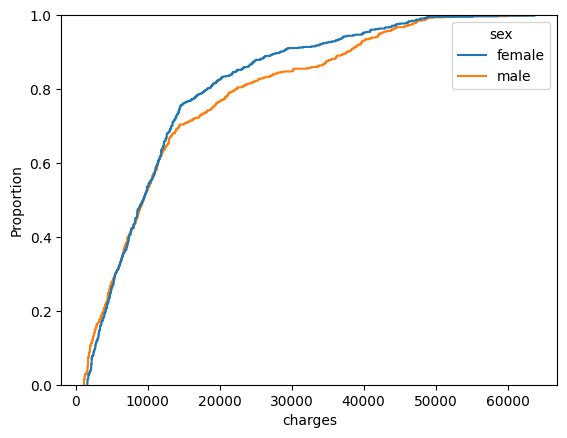

In [46]:
sns.ecdfplot(data=df, x='charges', hue='sex')
s

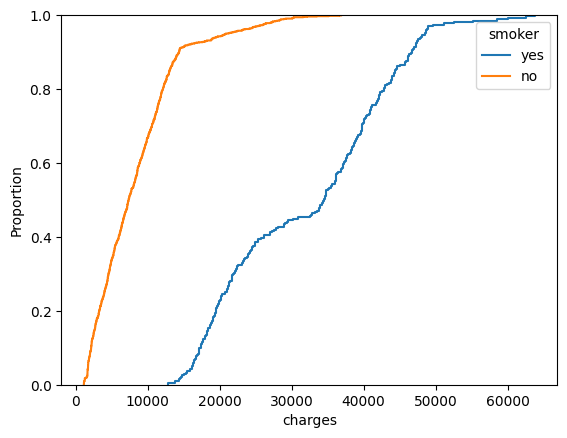

In [47]:
sns.ecdfplot(data=df, x='charges', hue='smoker')
s

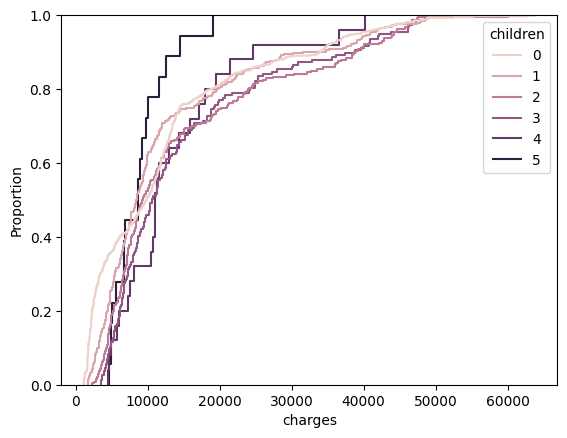

In [48]:
sns.ecdfplot(data=df, x='charges', hue='children')
s

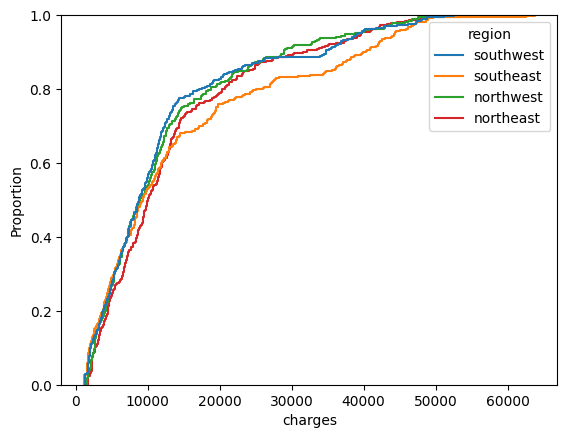

In [49]:
sns.ecdfplot(data=df, x='charges', hue='region')
s

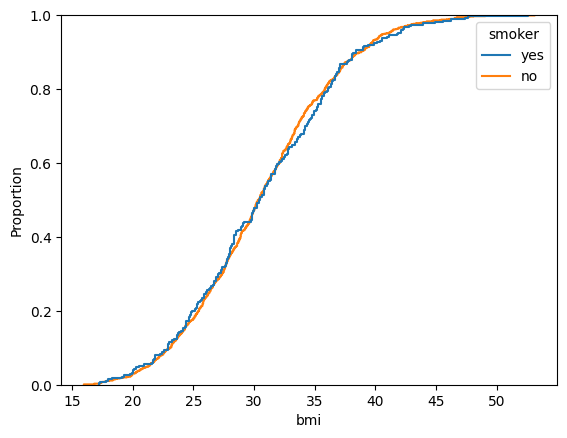

In [50]:
sns.ecdfplot(data=df, x='bmi', hue='smoker')
s

*Density Probability*

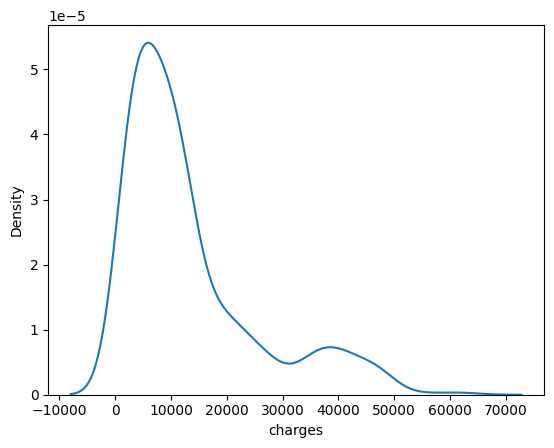

In [51]:
sns.kdeplot(data=df, x='charges', bw_method=.25)
s

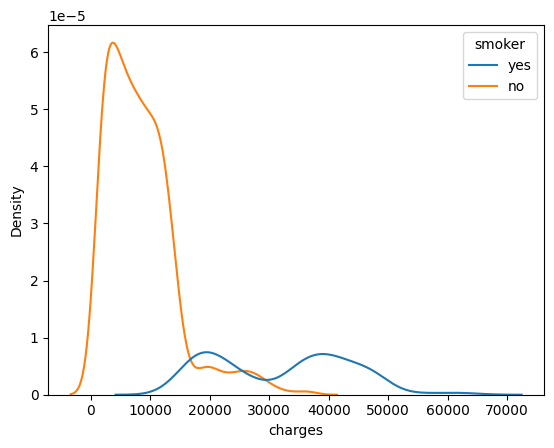

In [52]:
sns.kdeplot(data=df, x='charges', hue='smoker', bw_method=.25)
s

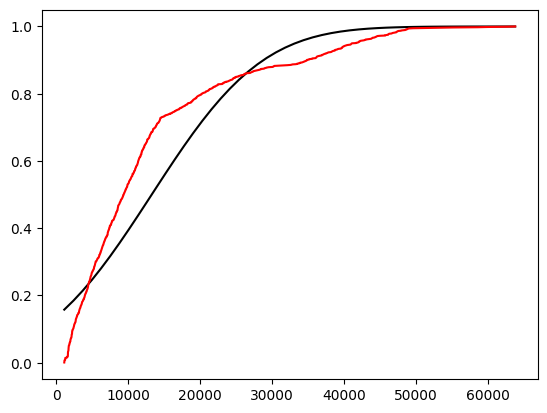

In [53]:
c_stats = df.charges.describe()
xs = np.linspace(c_stats['min'], c_stats['max'])
ys = scipy.stats.norm(c_stats['mean'], c_stats['std']).cdf(xs)

plt.plot(xs, ys, color='black')
empiricaldist.Cdf.from_seq(df.charges, normalize=True).plot(color='r')
s

### Relationship between variables

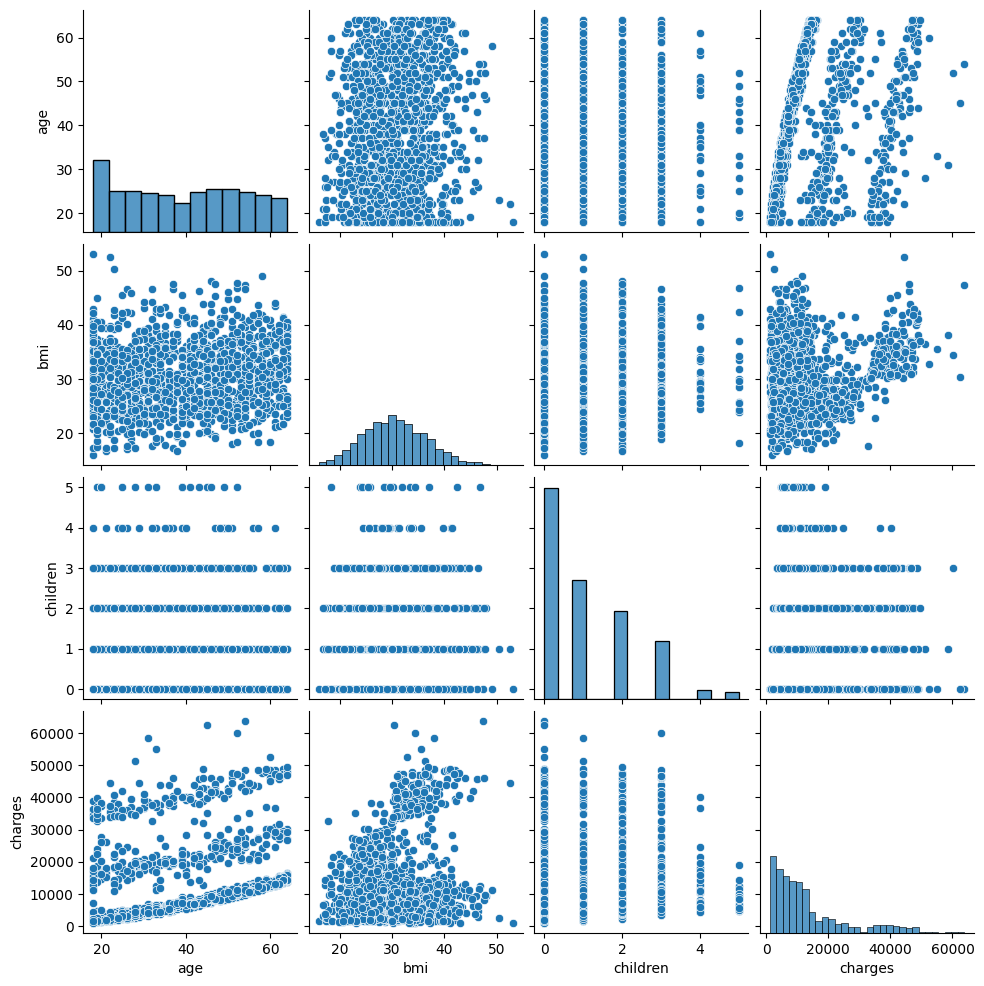

In [54]:
sns.pairplot(data=df)
s

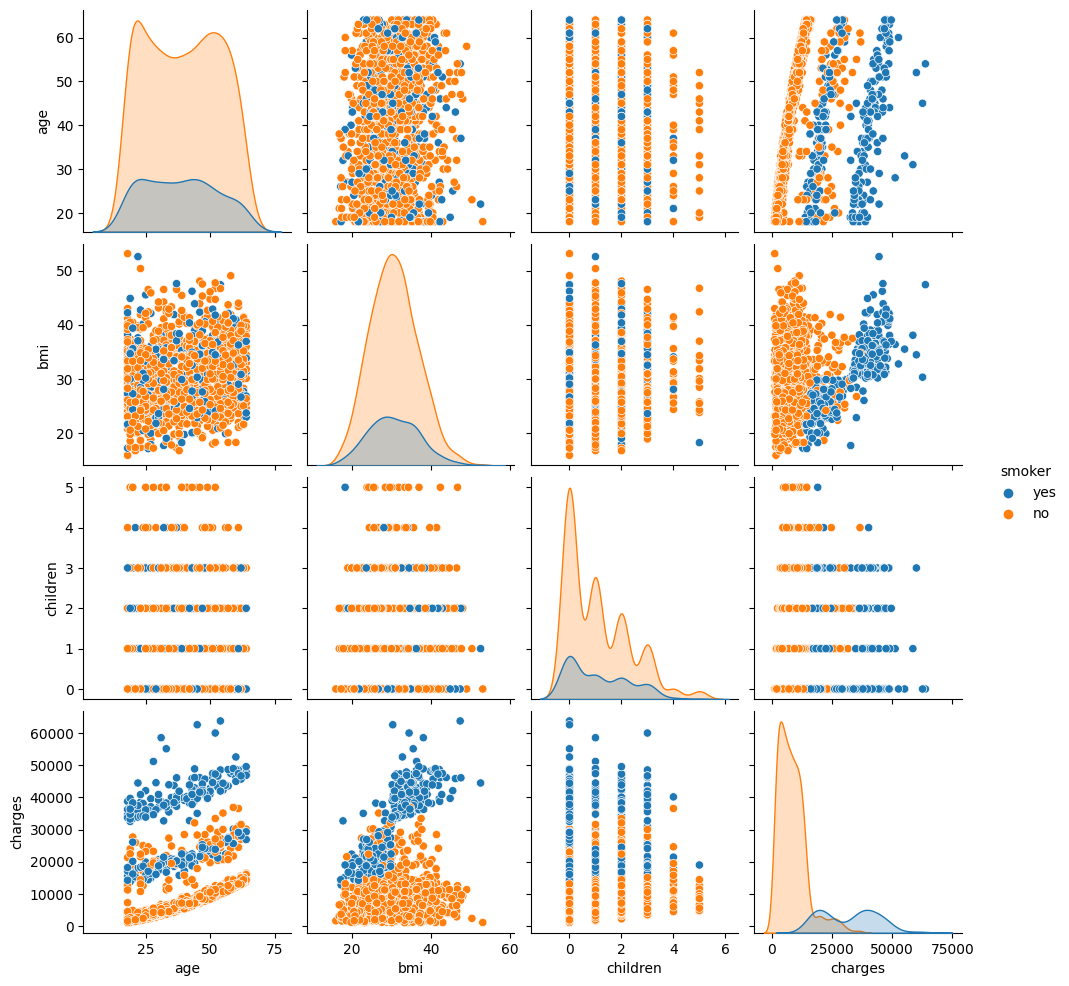

In [55]:
sns.pairplot(data=df, hue='smoker')
s

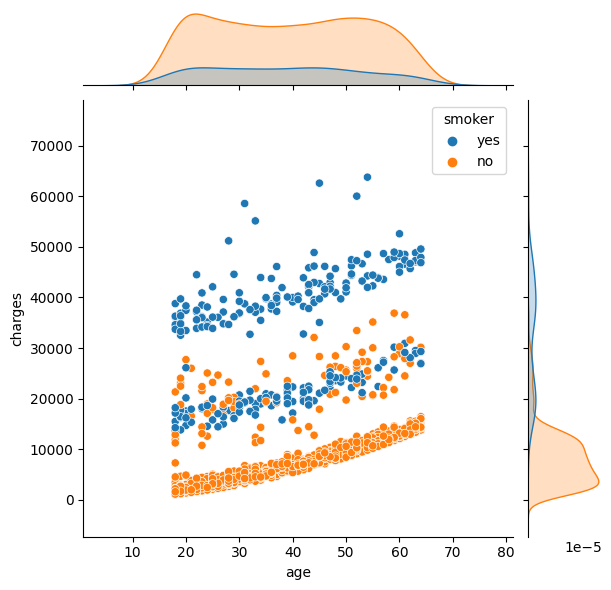

In [56]:
sns.jointplot(data=df, x='age', y='charges', hue='smoker')
s

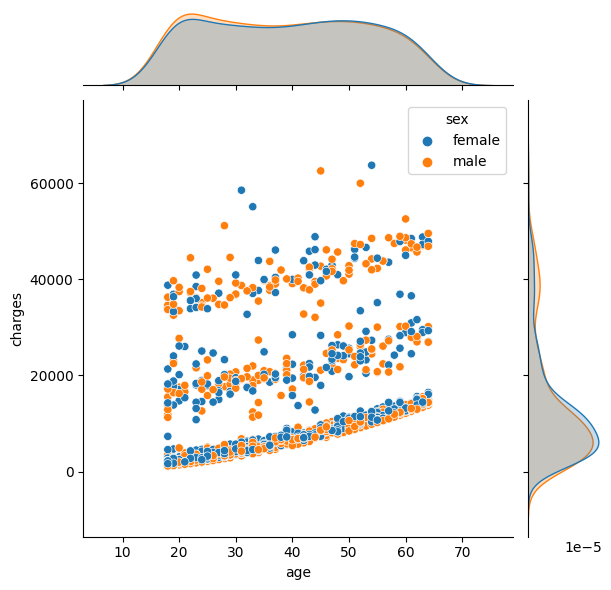

In [57]:
sns.jointplot(data=df, x='age', y='charges', hue='sex')
s

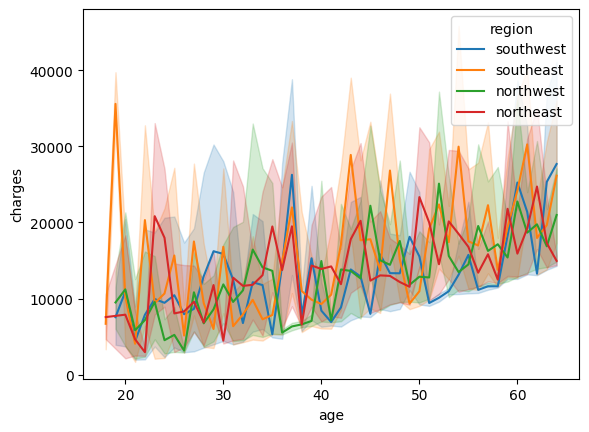

In [58]:
sns.lineplot(data=df, x='age', y='charges', hue='region')
s

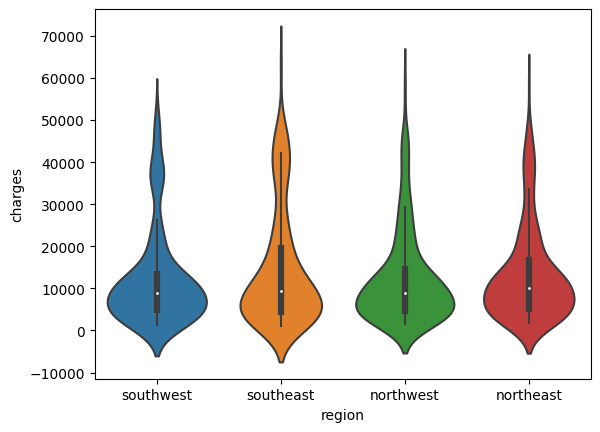

In [59]:
sns.violinplot(data=df, x='region', y='charges')
s

In [60]:
df.corr()

C:\Users\fchav\AppData\Local\Temp\ipykernel_3288\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000
